In [1]:
import GPyOpt
from numpy.random import seed
import numpy as np
seed(123)

X_train = np.arange(-3, 4, 1).reshape(-1, 1)

X_init = np.array([[10, 10, 10, 10, 10, 10], [20, 20, 20, 20, 20, 20], [30, 30, 30, 30, 30, 30], [40, 40, 40, 40, 40, 40], [50, 50, 50, 50, 50, 50], [60, 60, 60, 60, 60, 60], [70, 70, 70, 70, 70, 70]])
Y_init = np.array([[26.64126665], [121.55343009], [159.84569234], [202.82715852], [48.71245611], [73.7318236], [367.03408625]])

In [2]:
# X_init = np.array([[10], [20], [30], [40], [50], [60], [70]])
# Y_init = np.array([[75], [50], [25], [50], [75], [100], [125]])

In [3]:
# def func(x):
    
#     if x <= 30:
#         return -2.5*x + 100
    
#     if x>30:
#         return 2.5*x - 50
#     --fine results when we consider only one dimension.

In [4]:
func  = GPyOpt.objective_examples.experimentsNd.alpine1(input_dim=6) 

In [5]:
# func = GPyOpt.objective_examples.experiments1d.forrester() 

In [6]:
mixed_domain =[{'name': 'var1', 'type': 'discrete', 'domain': (10, 20, 30, 40, 50, 60, 70, 80, 90),'dimensionality': 6}]

# domain =[{'name': 'var1', 'type': 'continuous', 'domain': (0,1)}]

In [7]:
iter_count = 50
current_iter = 0

# X_init = np.array([[0.0],[0.5],[1.0]])
# Y_init = func.f(X_init)

X_step = X_init
Y_step = Y_init

In [176]:
seed(123)
while current_iter < iter_count:
    myBopt = GPyOpt.methods.BayesianOptimization(f = None,                     # Objective function       
                                                 domain=mixed_domain,          # Box-constraints of the problem
#                                                   acquisition_type='EI',        # Expected Improvement
                                                 X = X_step, Y = Y_step)       # True evaluations, no sample noise
    x_next = myBopt.suggest_next_locations()
    
    y_next = func.f(x_next)
    
    X_step = np.vstack((X_step, x_next))
    Y_step = np.vstack((Y_step, y_next))
    
    current_iter += 1

In [128]:
func.f(X_init[6])

array([[367.03408625]])

In [115]:
import matplotlib.pyplot as plt
# for i in range(10, 100, 10):
#     plt.plot(i, func(i))
#     print(func(i))
    
x_next

array([[30, 20, 10, 20, 30, 10]])

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

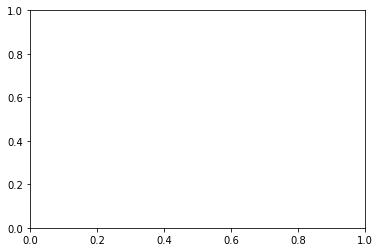

In [179]:
# x = np.arange(10.0, 100.0, 10.0)
# y = func(x)

# plt.figure()
# plt.plot(x, y)
for i, (xs, ys) in enumerate(zip(X_step, Y_step)):
    plt.plot(xs, ys, 'rD', markersize=10 + 20 * (i+1)/len(X_step))

In [178]:
Y_step

array([[ 26.64126665],
       [121.55343009],
       [159.84569234],
       [202.82715852],
       [ 48.71245611],
       [ 73.7318236 ],
       [367.03408625],
       [249.3222601 ],
       [100.08402358],
       [ 96.29808598],
       [118.4988236 ],
       [122.61553404],
       [102.68012969],
       [112.11677989],
       [112.11677989],
       [171.49924448],
       [ 57.05224527],
       [102.68012969],
       [125.66240129],
       [ 65.39203443],
       [112.11677989],
       [ 96.29808598],
       [129.93970189],
       [ 58.27865446],
       [131.62173945],
       [122.61553404],
       [139.96152861],
       [109.84370739],
       [118.4988236 ],
       [124.88086731],
       [ 86.90792359],
       [ 78.56813443],
       [ 75.57445131],
       [200.26884303],
       [ 69.1924076 ],
       [125.76980731],
       [ 80.47939208],
       [161.47987919],
       [216.02661356],
       [184.67534447],
       [108.42381274],
       [114.27574488],
       [111.66075527],
       [ 96

In [136]:
myBopt.plot_convergence()

AttributeError: 'BayesianOptimization' object has no attribute 'Y_best'

In [8]:
seed(123)
bo_loop = GPyOpt.methods.BayesianOptimization(f = func.f, domain = mixed_domain, X = X_step, Y = Y_step)
max_iter = 50
bo_loop.run_optimization(max_iter)
X_loop = bo_loop.X
Y_loop = bo_loop.Y

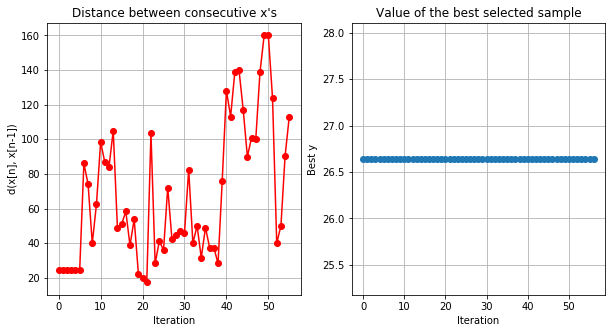

In [9]:
bo_loop.plot_convergence()

In [162]:
func.f(np.array([10., 20., 10., 50., 50., 60.]))

array([[57.66544987]])

In [173]:
Y_loop

array([[ 26.64126665],
       [121.55343009],
       [159.84569234],
       [202.82715852],
       [ 48.71245611],
       [ 73.7318236 ],
       [367.03408625],
       [242.15868241],
       [188.18554666],
       [228.1957901 ],
       [174.17284773],
       [179.72935056],
       [336.02378627],
       [112.11677989],
       [112.11677989],
       [112.11677989],
       [104.25391816],
       [102.68012969],
       [167.00927003],
       [163.15945532],
       [112.11677989],
       [ 96.29808598],
       [112.59370732],
       [ 58.27865446],
       [ 57.05224527],
       [122.61553404],
       [ 61.22213985],
       [109.84370739],
       [118.4988236 ],
       [124.88086731],
       [ 86.90792359],
       [ 78.56813443],
       [135.79163403],
       [111.66075527],
       [ 87.64296977],
       [131.62173945],
       [132.044445  ],
       [118.44563946],
       [196.68024388],
       [111.66075527],
       [196.68024388],
       [196.68024388],
       [178.73163647],
       [196

In [164]:
bo_loop.x_opt

array([10., 10., 10., 10., 10., 10.])